# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import math

# Versiones de librerías
print("".join(f"{x[0]}:{x[1]}\n" for x in [
    ("Pandas",pd.__version__),
    ("Numpy",np.__version__),
    ("Matplotlib",matplotlib.__version__),
    ("SKlearn",sklearn.__version__),
    ("Seaborn",sns.__version__)
]))

Pandas:1.1.3
Numpy:1.19.2
Matplotlib:3.2.0
SKlearn:0.24.2
Seaborn:0.11.0



# Load dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

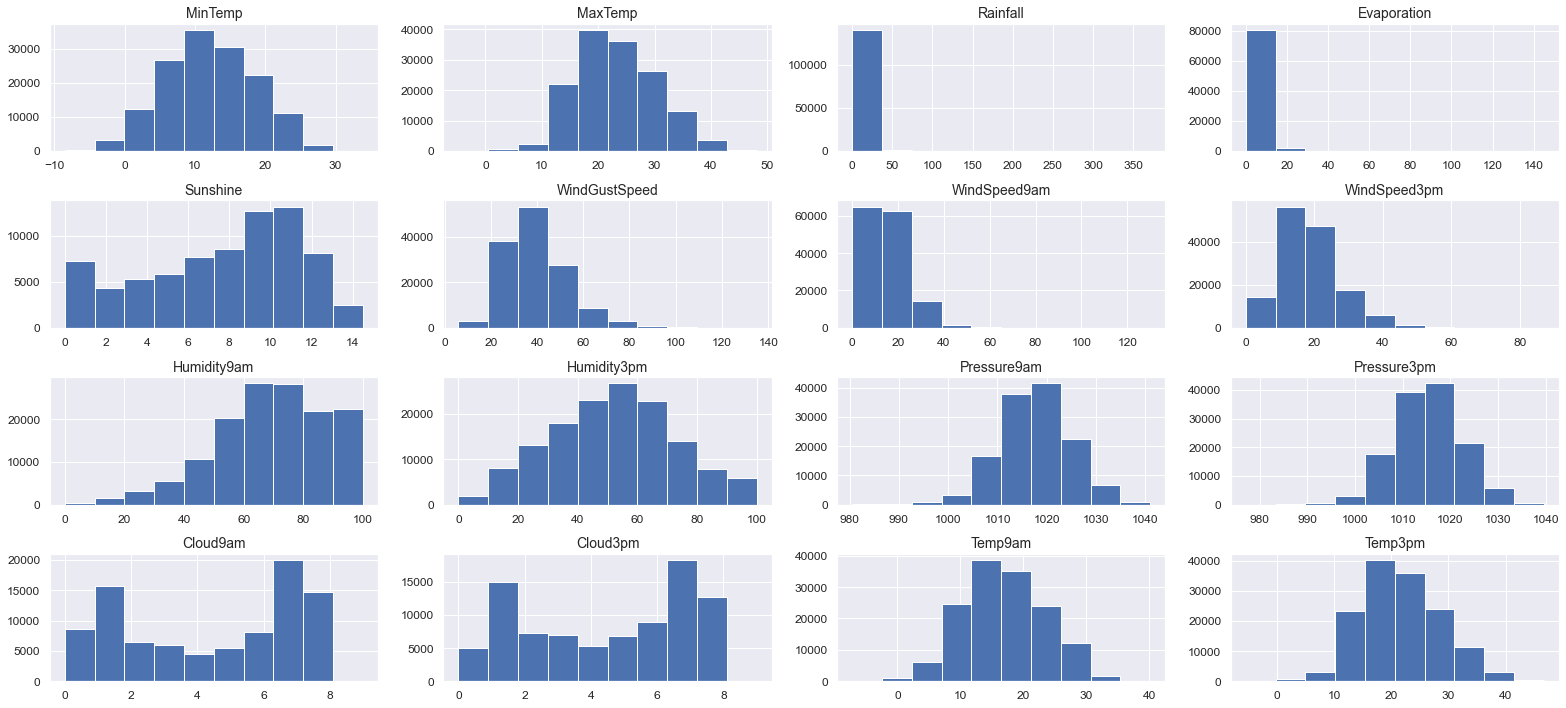

In [4]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
display_dataset_distributions(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


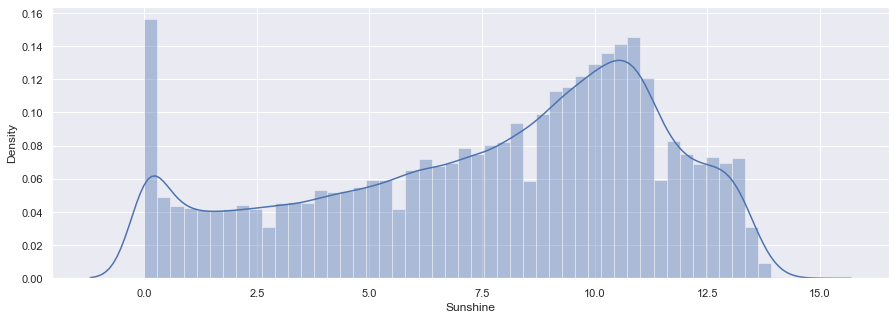

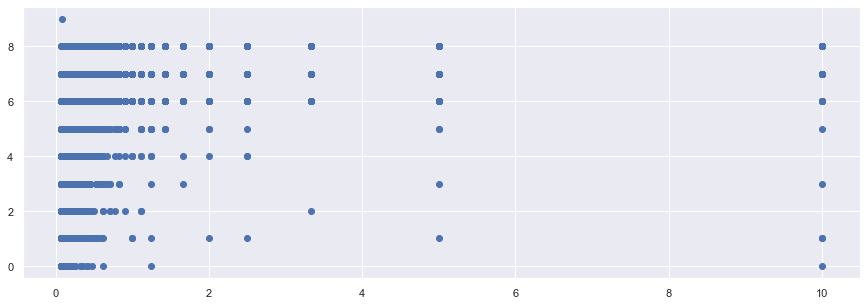

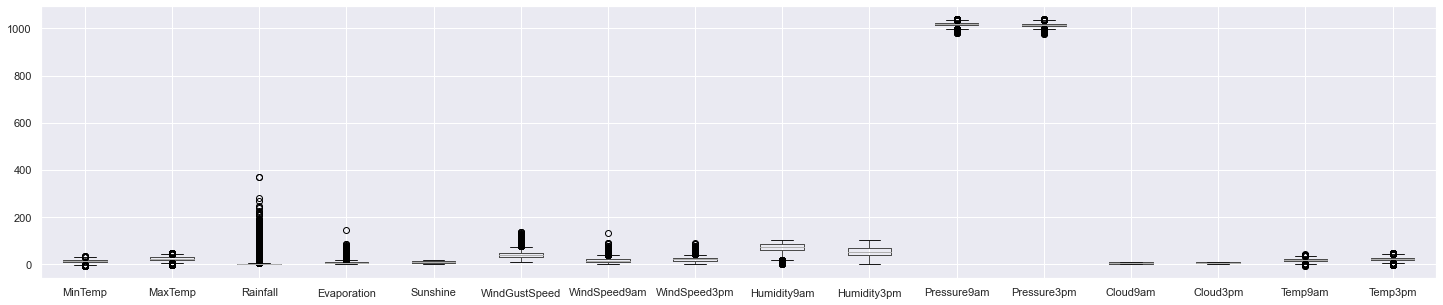

In [5]:
fig = plt.figure(figsize=(15,5)), sns.distplot(df['Sunshine'])
fig = plt.figure(figsize=(15,5)), plt.scatter(1/df['Sunshine'],df['Cloud3pm'])
fig = plt.figure(figsize=(25,5)), df.boxplot()

# Add RainfallTomorrow

In [6]:
df['RainfallTomorrow']=df['Rainfall'].shift(-1)
df['RainfallYesterday']=df['Rainfall'].shift(1)
df['RainYesterday']=df['RainToday'].shift(1)

df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  RainfallTomorrow  \
0     16.9     21.8         No            No               0.0   
1     17.2     24.3         No            No               0.0   
2     21.0     23.2         No            No               0.0   

   RainfallYesterday  RainYesterday  
0                NaN            NaN  
1                0.6             No  
2                0.0             No  

[3 rows x 26 columns]

# Split into Train Test

In [7]:
df = df[df['RainTomorrow'].notna()]
# df = df[df['RainfallTomorrow'].notna()]
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.447983
MaxTemp               0.226453
Rainfall              0.988797
Evaporation          42.789026
Sunshine             47.692924
WindGustDir           6.561504
WindGustSpeed         6.519308
WindDir9am            7.041838
WindDir3pm            2.656952
WindSpeed9am          0.948007
WindSpeed3pm          1.849599
Humidity9am           1.247600
Humidity3pm           2.538803
Pressure9am           9.855619
Pressure3pm           9.832411
Cloud9am             37.735332
Cloud3pm             40.152469
Temp9am               0.635756
Temp3pm               1.917113
RainToday             0.988797
RainTomorrow          0.000000
RainfallTomorrow      0.001407
RainfallYesterday     1.409352
RainYesterday         1.409352
dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['RainTomorrow','RainfallTomorrow'], axis=1),
    df['RainTomorrow'],
    test_size=0.15,
    random_state=0)

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("\ny_train = ")
print(y_train)

X_train.shape, X_test.shape = 
(120864, 24) (21329, 24)

y_train = 
104727     No
59147      No
49737      No
26070      No
117024    Yes
         ... 
43204      No
100206     No
98494      No
120883     No
44785     Yes
Name: RainTomorrow, Length: 120864, dtype: object


# Drop columns

In [9]:
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.447983
MaxTemp               0.226453
Rainfall              0.988797
Evaporation          42.789026
Sunshine             47.692924
WindGustDir           6.561504
WindGustSpeed         6.519308
WindDir9am            7.041838
WindDir3pm            2.656952
WindSpeed9am          0.948007
WindSpeed3pm          1.849599
Humidity9am           1.247600
Humidity3pm           2.538803
Pressure9am           9.855619
Pressure3pm           9.832411
Cloud9am             37.735332
Cloud3pm             40.152469
Temp9am               0.635756
Temp3pm               1.917113
RainToday             0.988797
RainTomorrow          0.000000
RainfallTomorrow      0.001407
RainfallYesterday     1.409352
RainYesterday         1.409352
dtype: float64


In [10]:
X_train.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

# Outliers

# Variable Encoding

In [11]:
y_train.replace({"No":0,"Yes":1},inplace=True)
X_train.replace({"No":0,"Yes":1},inplace=True)

In [31]:
labels = np.array(pd.unique(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].values.ravel('K')),dtype=np.str)
labels = np.delete(labels, np.argwhere(labels=='nan'))
print(labels)


['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


![cardenal_points](./cardenal_points.png)

In [42]:
# def wind_dir_circular_representation(dir):
#     return np.cos(2 * np.pi * (dir/16)), np.sin(2 * np.pi * (dir/16))

windDirDic = {
    "E": 0,
    "ENE": 1,
    "NE": 2,
    "NNE": 3,
    "N": 4,
    "NNW": 5,
    "NW": 6,
    "WNW": 7,
    "W": 8,
    "WSW": 9,
    "SW": 10,
    "SSW": 11,
    "S": 12,
    "SSE": 13,
    "SE": 14,
    "ESE": 15,
}

X_train.replace(windDirDic,inplace=True)

wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
for wd in wind_dir_colums:
    X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
    X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

X_train.drop(wind_dir_colums,axis=1)
X_train.head(3)

Date     Location  MinTemp  MaxTemp  Rainfall  WindGustDir  \
104727  2015-03-14    Nuriootpa      6.4     29.0       0.0          9.0   
59147   2011-10-02      Bendigo      6.2     16.5       0.0         14.0   
49737   2010-11-15  Tuggeranong     16.6     21.9      33.2          4.0   

        WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
104727           43.0         2.0        10.0           7.0          30.0   
59147            46.0        13.0        14.0          20.0          24.0   
49737            28.0         4.0         4.0          11.0          15.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
104727         43.0          9.0       1017.7       1015.3     16.6     27.9   
59147          66.0         40.0       1020.4       1020.2     10.5     15.7   
49737          97.0         73.0       1013.2       1010.6     17.5     20.6   

        RainToday  RainfallYesterday  RainYesterday  
104727        0.0                0.0            0.0  
59147         0.0                4.2            1.0  
49737         1.0                3.0            1.0

# Feature Selection / New Features

(<matplotlib.axes._subplots.AxesSubplot at 0x2b9a3117f70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b9a3117f70>)

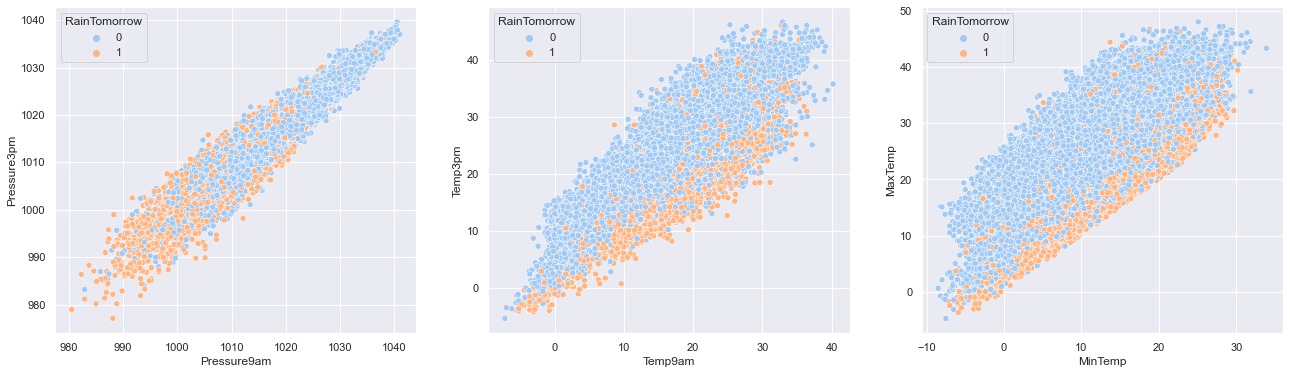

In [10]:
fig, axs = plt.subplots(1, 3,figsize=(22,6))

plt.subplot(1,3,1), sns.scatterplot(x='Pressure9am',y='Pressure3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,2), sns.scatterplot(x='Temp9am',y='Temp3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,3), sns.scatterplot(x='MinTemp',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)

In [9]:
# Pressures
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Pressure3pm.fillna(X_train.Pressure9am, inplace=True)
X_train.Pressure9am.fillna(X_train.Pressure3pm, inplace=True)
press_mean = (X_train['Pressure3pm'] + X_train['Pressure9am'])/2
X_train['PressureMean'] = press_mean
X_train.drop('Pressure3pm', inplace=True, axis=1)
X_train.drop('Pressure9am', inplace=True, axis=1)

# Temperatures
temp_diff = X_train['Temp3pm'] - X_train['Temp9am']
X_train['TempDiff'] = temp_diff
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Temp3pm.fillna(X_train.Temp9am, inplace=True)
X_train.Temp9am.fillna(X_train.Temp3pm, inplace=True)
temp_mean = (X_train['Temp3pm'] + X_train['Temp9am'])/2
X_train['TempMean'] = temp_mean
X_train.drop('Temp3pm', inplace=True, axis=1)
X_train.drop('Temp9am', inplace=True, axis=1)

# Temperatures max-min
max_temp_diff = X_train['MaxTemp'] - X_train['MinTemp']
X_train['TempMaxDiff'] = max_temp_diff
X_train.drop('MinTemp', inplace=True, axis=1)

Percentage of NaN:
Date                  0.000000
Location              0.000000
MaxTemp               0.230011
Rainfall              0.998643
Evaporation          42.812583
Sunshine             47.720579
WindGustDir           6.523862
WindGustSpeed         6.484147
WindDir9am            7.040144
WindDir3pm            2.649259
WindSpeed9am          0.958929
WindSpeed3pm          1.838430
Humidity9am           1.271677
Humidity3pm           2.535081
Cloud9am             37.860736
Cloud3pm             40.184008
RainToday             0.998643
RainfallYesterday     1.381718
RainYesterday         1.381718
RainTomorrow          0.000000
PressureMean          9.667064
TempDiff              2.301761
TempMean              0.252350
TempMaxDiff           0.611431
dtype: float64


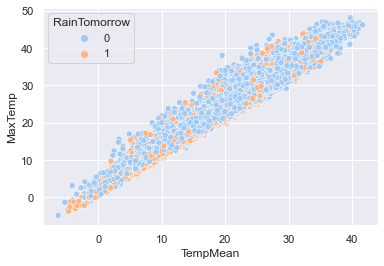

In [10]:
sns.scatterplot(x='TempMean',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)
print("Percentage of NaN:")
print(((1-X_train.count()/X_train.count().max())*100))

In [11]:
X_train.drop('MaxTemp', inplace=True, axis=1)

In [34]:
# '''*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*'''
# ''' Check if that makes sense '''
# hum_diff = df['Humidity3pm'] - df['Humidity9am']
# hum_mean = (df['Humidity3pm'] + df['Humidity9am'])/2
# df['HumidityDiff'] = hum_diff
# df['HumidityMean'] = hum_mean

# windSpeed_diff = df['WindSpeed3pm'] - df['WindSpeed9am']
# windSpeed_mean = (df['WindSpeed3pm'] + df['WindSpeed9am'])/2
# df['WindSpeedDiff'] = windSpeed_diff
# df['WindSpeedMean'] = windSpeed_mean

# cloud_diff = df['Cloud3pm'] - df['Cloud9am']
# cloud_mean = (df['Cloud3pm'] + df['Cloud9am'])/2
# df['CloudDiff'] = cloud_diff
# df['CloudMean'] = cloud_mean

# X_train.drop('Humidity3pm', inplace=True, axis=1)
# X_train.drop('Humidity9am', inplace=True, axis=1)
# X_train.drop('WindSpeed3pm', inplace=True, axis=1)
# X_train.drop('WindSpeed9am', inplace=True, axis=1)
# X_train.drop('Cloud3pm', inplace=True, axis=1)
# X_train.drop('Cloud9am', inplace=True, axis=1)
# ''' Check if that makes sense '''


# X_train.head()

# Correlation

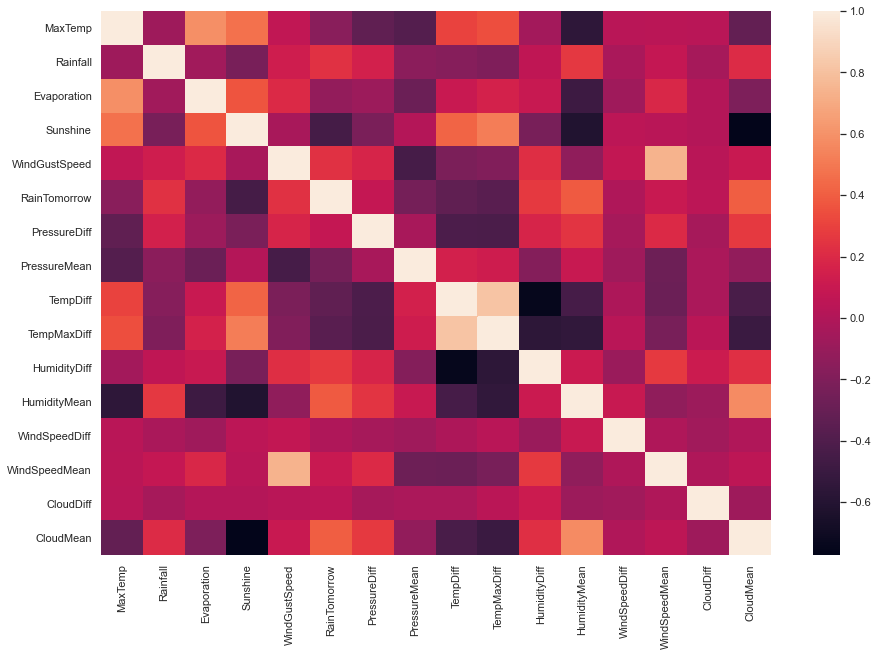

In [ ]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

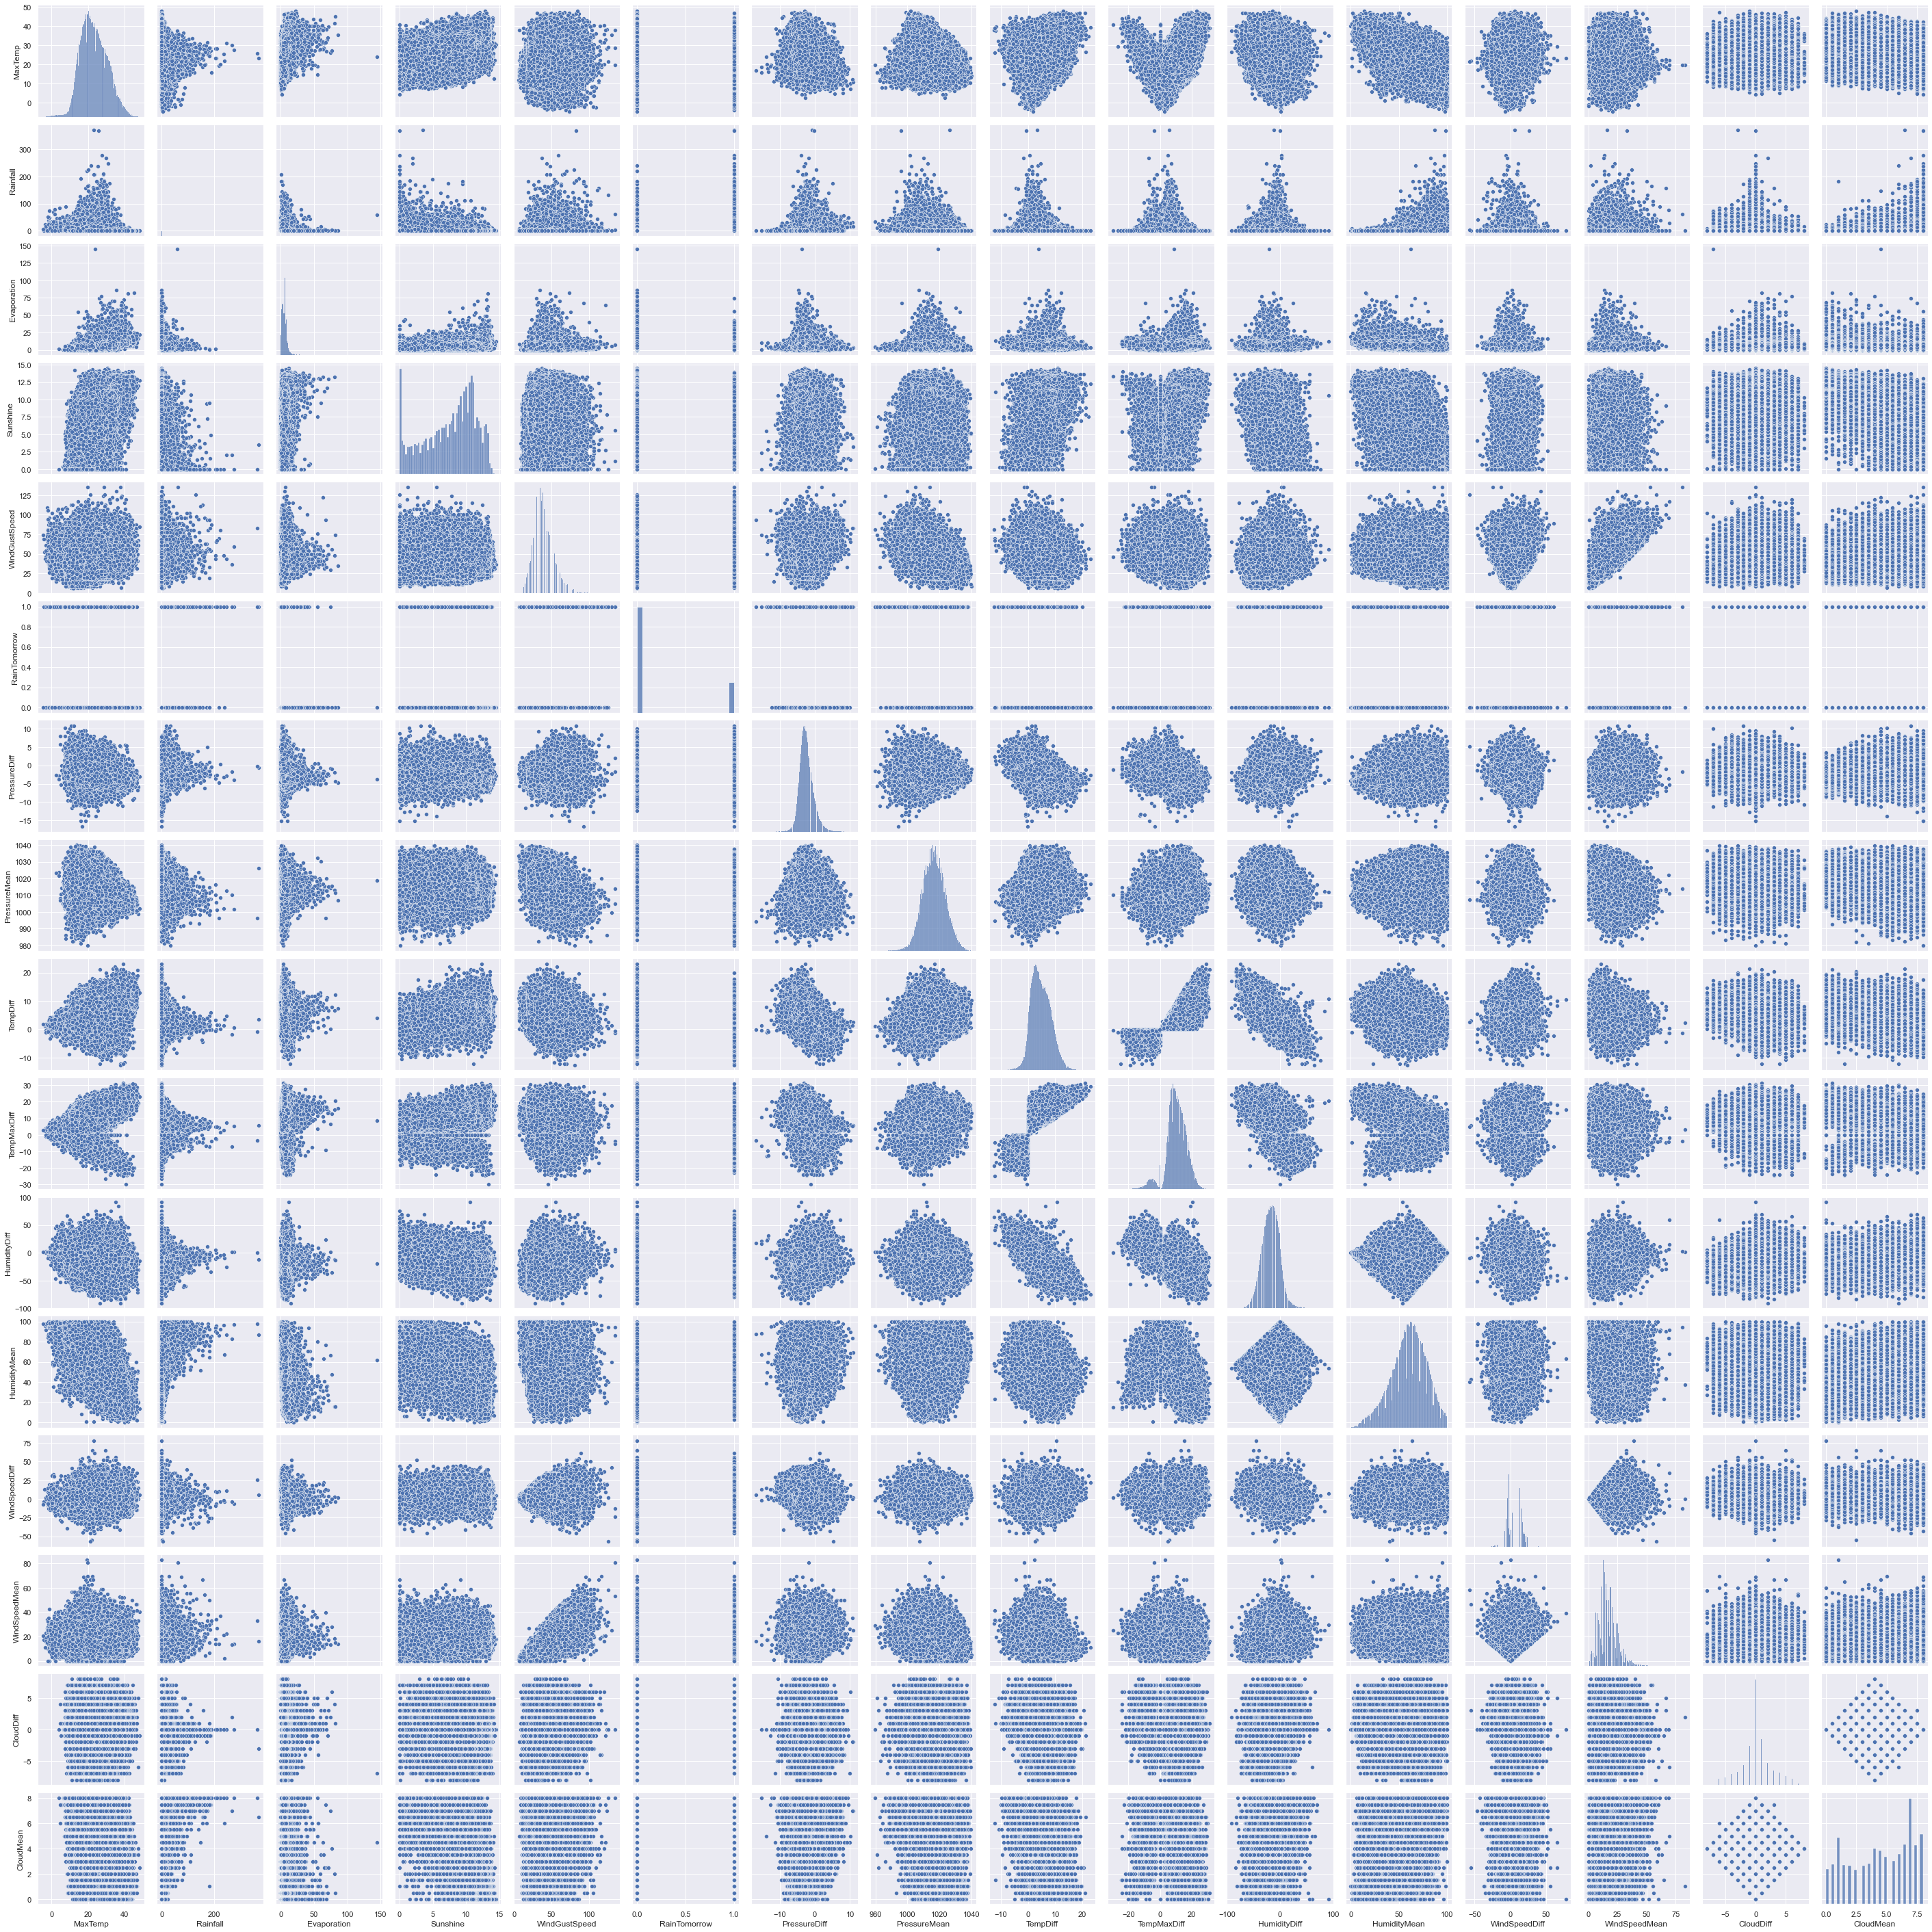

In [ ]:
# sns.pairplot(df)

# Imputation

In [27]:
df_train = X_train
df_train['RainTomorrow']=y_train

df_test = X_test
df_test['RainTomorrow']=y_test

In [12]:
print("Percentage of NaN:")
print(((1-X_train.count()/X_train.count().max())*100))

Percentage of NaN:
Date                  0.000000
Location              0.000000
Rainfall              0.998643
Evaporation          42.812583
Sunshine             47.720579
WindGustDir           6.523862
WindGustSpeed         6.484147
WindDir9am            7.040144
WindDir3pm            2.649259
WindSpeed9am          0.958929
WindSpeed3pm          1.838430
Humidity9am           1.271677
Humidity3pm           2.535081
Cloud9am             37.860736
Cloud3pm             40.184008
RainToday             0.998643
RainfallYesterday     1.381718
RainYesterday         1.381718
RainTomorrow          0.000000
PressureMean          9.667064
TempDiff              2.301761
TempMean              0.252350
TempMaxDiff           0.611431
dtype: float64


In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

def select_features_mi(X_train, y_train, k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs


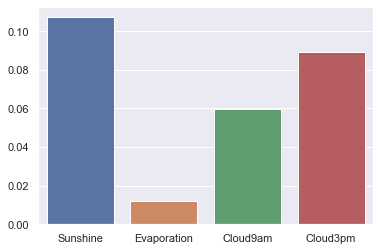

In [14]:
sub_df_train = df_train[['Sunshine','Evaporation','Cloud9am','Cloud3pm','RainTomorrow']]
sub_df_train = sub_df_train.dropna()

X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

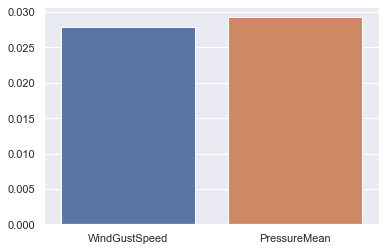

In [15]:
sub_df_train = df_train[['WindGustSpeed','PressureMean','RainTomorrow']]
sub_df_train = sub_df_train.dropna()

X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

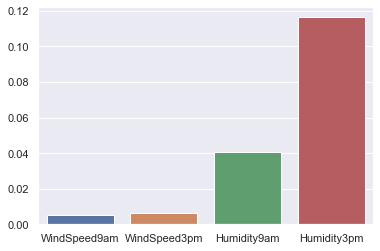

In [16]:
sub_df_train = df_train[['WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','RainTomorrow']]
sub_df_train = sub_df_train.dropna()

X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

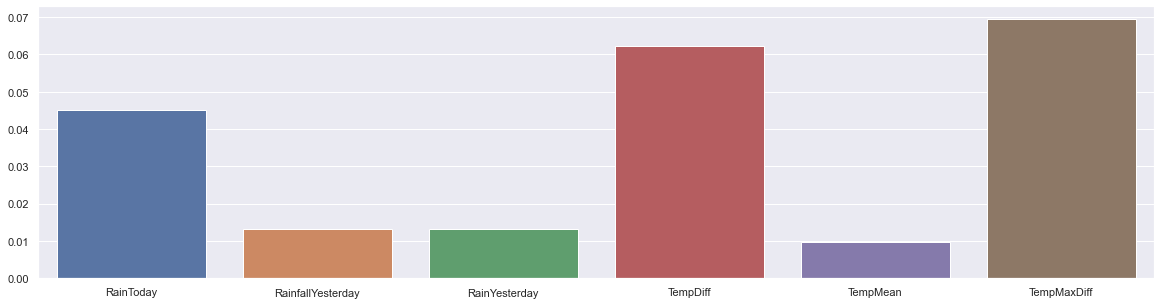

In [24]:
sub_df_train = df_train[['RainToday','RainfallYesterday','RainYesterday','TempDiff','TempMean','TempMaxDiff','RainTomorrow']]
sub_df_train = sub_df_train.dropna()

X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
fig = plt.figure(figsize=(20,5))
sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

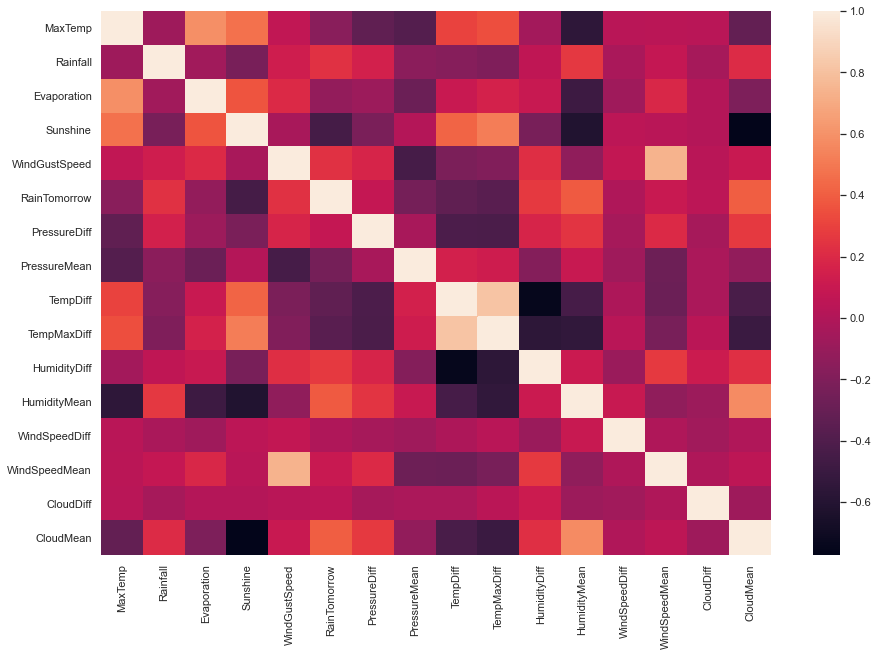

In [ ]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

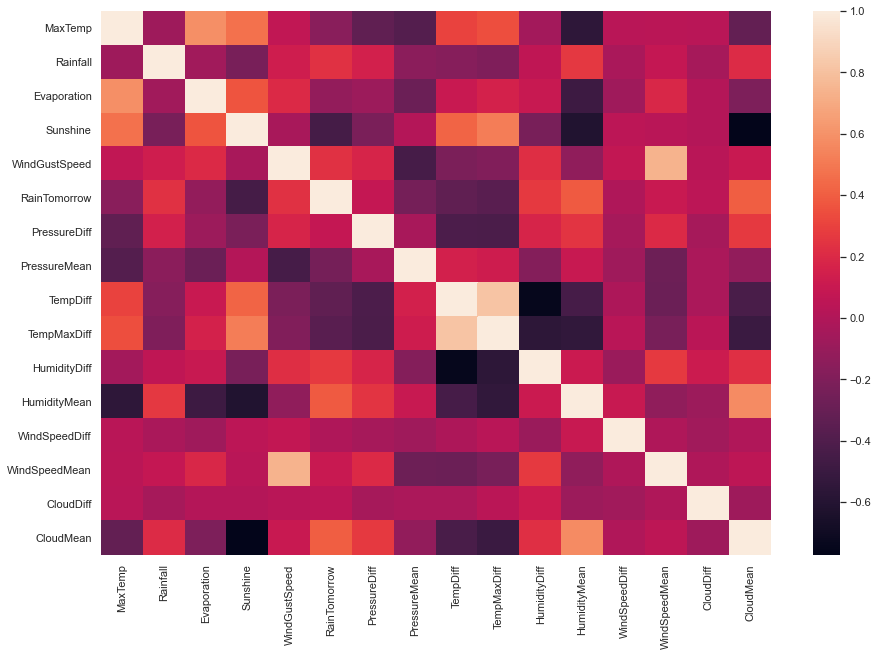

In [ ]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

# Variable encoding

# Normalization

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import QuantileTransformer


# Imputación y codificación
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:

from sklearn.compose import ColumnTransformer

numeric_features = [df['Rainfall'], df['Sunshine']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
	
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

model = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0         0.6
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: Rainfall, Length: 145460, dtype: float64,
                                                   0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
145455   NaN
145456   NaN
145457   NaN
145458   NaN
145459   NaN
Name: Sunshine, Length: 145460, dtype: float64])]))])

In [ ]:
numerics_datetypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = X_train.select_dtypes(include=numerics_datetypes).columns
df[numeric_features].head(1)

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  RainTomorrow  \
0     22.9       0.6          NaN       NaN           44.0           0.0   

   PressureDiff  PressureMean  TempDiff  TempMaxDiff  HumidityDiff  \
0          -0.6        1007.4       4.9          9.5         -49.0   

   HumidityMean  WindSpeedDiff  WindSpeedMean  CloudDiff  CloudMean  
0          46.5            4.0           22.0        NaN        NaN

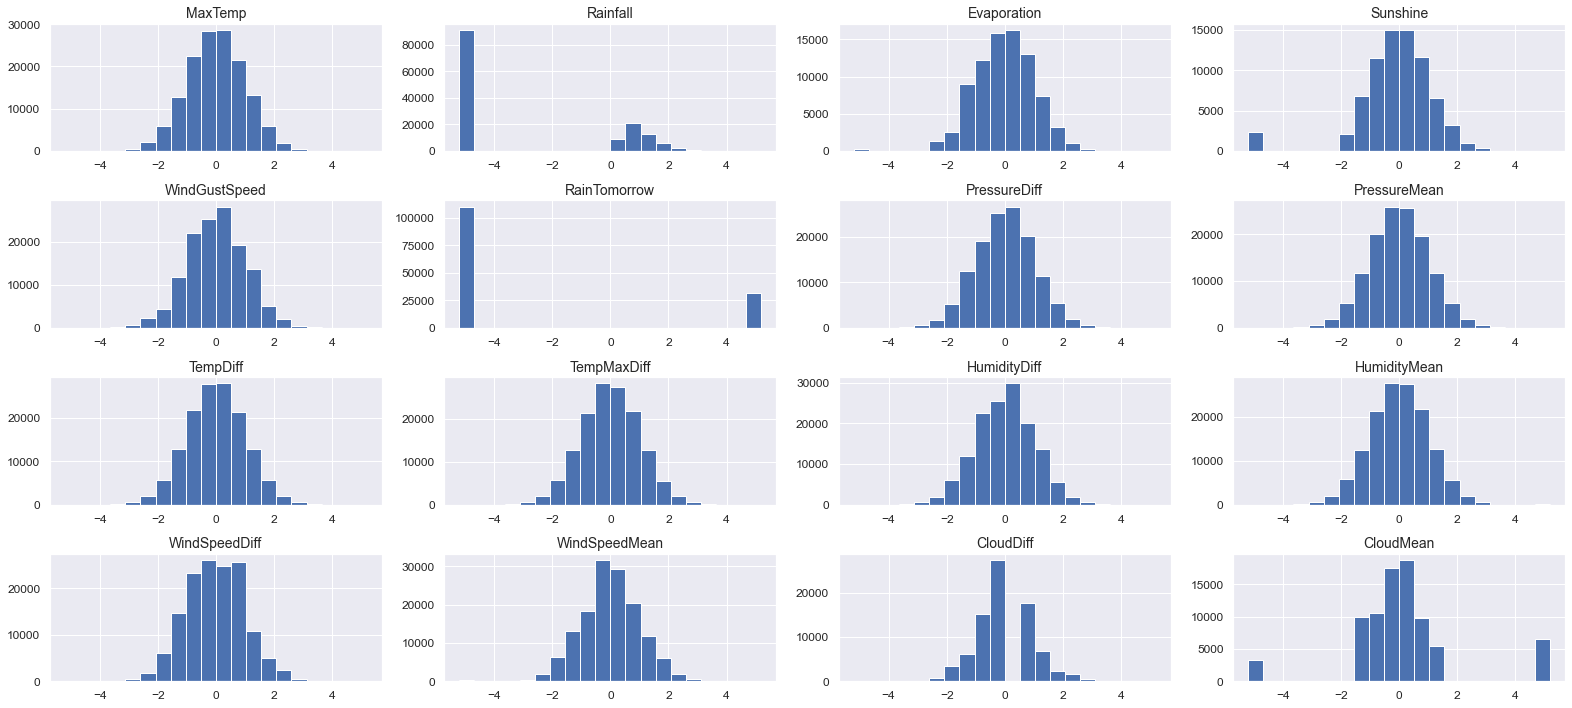

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline 

# Distribución transformada    
pipeline = Pipeline(
    steps=[
    ( 'qt' , QuantileTransformer(output_distribution= 'normal'))
])
df_transformed_numeric= pipeline.fit_transform(df[numeric_features])
df_transformed = pd.DataFrame(df_transformed_numeric,columns=numeric_features)
df_transformed.head()
display_dataset_distributions(df_transformed,bins=20)